<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/plot_mnist_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of MLP weights on MNIST

- From [Visualization of MLP weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-download-auto-examples-neural-networks-plot-mnist-filters-py) in [scikit-learn.org](https://scikit-learn.org/stable/) documentation site.

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.



## Introduction

Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The MNIST input data consists of $28x28$ pixel handwritten digits, leading to $784$
features in the dataset. Therefore the first layer weight matrix have the shape
($784$, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a $28x28$ pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.

In [1]:
%matplotlib inline

In [44]:
class Context:
    VERBOSE=True        # False to omit the iteration lines
    MAX_ITER=10         # Total number of epochs to train for
    LAYERS=(50,)        # Structure of the MLP hidden layers
    ALPHA=1e-4          # L2 penalty (regularization term) parameter.
    SOLVER='sgd'        # 'sgd' for 'stochastic gradient descent'; try ‘lbfgs’ or 'adam'
    TOLERANCE=1e-4      # Tolerance for the optimization. 
    RANDOM_STATE=None   # Default seed (None to start randomly)


The Context above can be adjusted to train for longer or with a deeper network.  You can experiment to find out how things look when you try different parameters. Check out [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) parameters for more.

In [38]:
#Context.MAX_ITER=50
#Context.LAYERS=(100,100)

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

def plot_MNIST_MLP_weights(dataset):
    print(f"- Please be patient. Loading {dataset} ...", end="")
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml(dataset, version=1, return_X_y=True)
    X = X / 255.

    # rescale the data, use the traditional train/test split
    X_train, X_test = X[:60000], X[60000:]
    y_train, y_test = y[:60000], y[60000:]

    # mlp = MLPClassifier(
    #          hidden_layer_sizes=(100, 100),
    #          max_iter=400, 
    #          alpha=1e-4,
    #          solver='sgd', 
    #          verbose=10, 
    #          tol=1e-4,
    #          random_state=1)
    mlp = MLPClassifier(
               hidden_layer_sizes=Context.LAYERS,
               max_iter=Context.MAX_ITER, 
               alpha=Context.ALPHA,
               solver=Context.SOLVER,
               verbose=Context.VERBOSE,
               tol=Context.TOLERANCE,
               random_state=Context.RANDOM_STATE,
               learning_rate_init=.1)

    print(" Loaded.  Training...")
    mlp.fit(X_train, y_train)
    print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Test set score: %f" % mlp.score(X_test, y_test))

    fig, axes = plt.subplots(4, 4)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
    for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
        ax.matshow(
                coef.reshape(28, 28), 
                cmap=plt.cm.gray, 
                vmin=.5 * vmin,
                vmax=.5 * vmax)
        ax.set_xticks(())
        ax.set_yticks(())

    plt.show()
    print("_" * 100) ; print("_" * 100) ; print("_" * 100) 

Automatically created module for IPython interactive environment


## Datasets

This example assumes that the inputs are MNIST formatted datasets.  This means they have 28x28 pixel grayscale images grouped into ten categories.

The [OpenML datasets](https://www.openml.org/search?type=data) is used as the source for this routine.

- The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset contains 60,000 training images and 10,000 testing image. 

<figure>
  <center>
    <img src="../images/MNIST.png" />
  </center>
</figure>

- Please be patient. Loading mnist_784 ... Loaded.  Training...
Iteration 1, loss = 0.31102813
Iteration 2, loss = 0.14592855
Iteration 3, loss = 0.11107947
Iteration 4, loss = 0.09221546
Iteration 5, loss = 0.08026233
Iteration 6, loss = 0.06888373
Iteration 7, loss = 0.06200381
Iteration 8, loss = 0.05486173
Iteration 9, loss = 0.05070432
Iteration 10, loss = 0.04522631


C:\Users\john.fogarty\Anaconda3\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.990400
Test set score: 0.974200


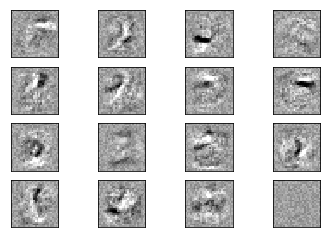

____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________


In [40]:
plot_MNIST_MLP_weights('mnist_784')

## Fashion MNIST

- The [Fashion MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) is a nice variant of MNIST. This one is a set of 10 clothing articles.

<figure>
  <center>
    <img src="../images/MNIST_fashion.jpeg" width="50%" />
  </center>
</figure>

- Please be patient. Loading Fashion-MNIST ... Loaded.  Training...
Iteration 1, loss = 0.53301195
Iteration 2, loss = 0.39092529
Iteration 3, loss = 0.36023401
Iteration 4, loss = 0.34262848
Iteration 5, loss = 0.32810517
Iteration 6, loss = 0.31465643
Iteration 7, loss = 0.30548974
Iteration 8, loss = 0.29644631
Iteration 9, loss = 0.29090005
Iteration 10, loss = 0.28352731


C:\Users\john.fogarty\Anaconda3\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.902200
Test set score: 0.873600


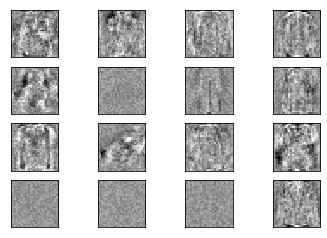

____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________


In [41]:
plot_MNIST_MLP_weights('Fashion-MNIST')

### Kuzushiji MNIST

- The [Kuzushiji MNIST](https://towardsdatascience.com/kuzushiji-mnist-japanese-literature-alternative-dataset-for-deep-learning-tasks-d48ae3f5395b) is another nice variant of MNIST. This one is a set of 10 Japanese Hiragana characters.

<figure>
  <center>
    <img src="../images/MNIST_kuzushiji.png" width="50%" />
  </center>
</figure>

- Please be patient. Loading Kuzushiji-MNIST ... Loaded.  Training...
Iteration 1, loss = 0.48411763
Iteration 2, loss = 0.25883972
Iteration 3, loss = 0.20617189
Iteration 4, loss = 0.17348422
Iteration 5, loss = 0.15460247
Iteration 6, loss = 0.13677123
Iteration 7, loss = 0.12210775
Iteration 8, loss = 0.11420251
Iteration 9, loss = 0.10610698
Iteration 10, loss = 0.09665324


C:\Users\john.fogarty\Anaconda3\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.976167
Test set score: 0.857100


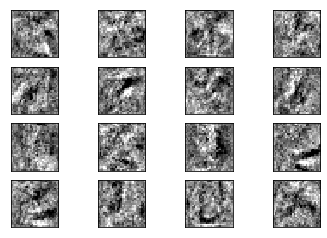

____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________


In [43]:
plot_MNIST_MLP_weights('Kuzushiji-MNIST')

### End of notebook.